# Shoreline and Catch Basin Data

## Shoreline Data

In [14]:
from osgeo import gdal, gdal_array, osr, ogr
import numpy as np
import rasterio
#from affine import Affine
import pyproj
import pandas as pd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geopandas as gpd
import matplotlib.pyplot as plt

## Load shoreline data

In [5]:
shoreline_data = gpd.read_file('/workspace/w210/Shoreline/NYC_2017_LiDAR_Low_Tide_Shoreline.shp')

In [6]:
shoreline_data.head()

,Feature,Type,geometry
0,Shoreline,Bathymetric - low tide,"LINESTRING Z (914245.542 119924.624 0.000, 914..."
1,Shoreline,Bathymetric - low tide,"LINESTRING Z (921853.440 120210.369 0.000, 921..."
2,Shoreline,Bathymetric - low tide,"LINESTRING Z (919613.833 121459.244 0.000, 919..."
3,Shoreline,Bathymetric - low tide,"LINESTRING Z (919666.992 121515.874 0.000, 919..."
4,Shoreline,Bathymetric - low tide,"LINESTRING Z (921742.418 121910.178 0.000, 921..."


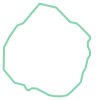

In [7]:
shoreline_data['geometry'][0]

In [7]:
#view shapefile metadata
shoreline_data.type

0           LineString
1           LineString
2           LineString
3           LineString
4           LineString
            ...       
297         LineString
298         LineString
299         LineString
300    MultiLineString
301    MultiLineString
Length: 302, dtype: object

In [8]:
#Find extent of area of interest
shoreline_data.bounds

,minx,miny,maxx,maxy
0,9.142370e+05,119922.011858,9.142696e+05,119956.869342
1,9.218369e+05,120208.088189,9.218926e+05,120263.605000
2,9.195835e+05,121446.699764,9.196371e+05,121463.260638
3,9.196508e+05,121459.197847,9.196847e+05,121527.971415
4,9.216673e+05,121869.531187,9.217806e+05,121985.378001
...,...,...,...,...
297,1.019262e+06,248828.956672,1.019296e+06,248985.578564
298,1.018991e+06,255210.391777,1.019390e+06,255713.960911
299,1.016232e+06,236767.685340,1.025088e+06,271279.304200
300,1.002874e+06,235606.103892,1.025060e+06,271286.575972


In [8]:
#view shoreline_data coordinate reference system
shoreline_data.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Load Catch Batch Data

In [9]:
catchbasin_data = gpd.read_file('/workspace/w210/catchbasindata/DEPCATCHBASINS.shp')

In [69]:
catchbasin_data.bounds

,minx,miny,maxx,maxy
0,9.302306e+05,128315.9475,9.302306e+05,128315.9475
1,9.302324e+05,128271.1119,9.302324e+05,128271.1119
2,9.297651e+05,128081.6211,9.297651e+05,128081.6211
3,9.297840e+05,128055.3674,9.297840e+05,128055.3674
4,9.297074e+05,128268.6756,9.297074e+05,128268.6756
...,...,...,...,...
153367,1.033593e+06,243667.0210,1.033593e+06,243667.0210
153368,1.033889e+06,243943.3771,1.033889e+06,243943.3771
153369,1.033715e+06,244013.8713,1.033715e+06,244013.8713
153370,1.033486e+06,244357.6753,1.033486e+06,244357.6753


In [12]:
catchbasin_data.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [84]:
#get min and max x and y values
#function to return min and max coordinate values of dataset
def dataset_minmax(dataset, reduction_factor):
    reduction_factor = float(reduction_factor)
    global minx, miny, maxx, maxy, reducedminx, reducedminy, reducedmaxx, reducedmaxy
    minx = dataset['POINT_X'].min()
    miny = dataset['POINT_Y'].min()
    maxx = dataset['POINT_X'].max()
    maxy = dataset['POINT_Y'].max()
    reducedminx = reduction_factor*minx
    reducedminy = reduction_factor*miny
    reducedmaxx = reduction_factor*maxx
    reducedmaxy = reduction_factor*maxy
    print('dataset min x value is: ' + str(minx) + ' Reduced by ' + str(reduction_factor) + ' is ' + str(reducedminx))
    print('dataset min y value is: ' + str(miny)+ ' Reduced by ' + str(reduction_factor) + ' is ' + str(reducedminy))
    print('dataset max x value is: ' + str(maxx)+ ' Reduced by ' + str(reduction_factor) + ' is ' + str(reducedmaxx))
    print('dataset max y value is: ' + str(maxy)+ ' Reduced by ' + str(reduction_factor) + ' is ' + str(reducedmaxy))


In [85]:
dataset_minmax(catchbasin_data, .25)

dataset min x value is: 913346.42030001 Reduced by 0.25 is 228336.6050750025
dataset min y value is: 120928.153355 Reduced by 0.25 is 30232.03833875
dataset max x value is: 1067265.79700001 Reduced by 0.25 is 266816.4492500025
dataset max y value is: 271705.03179779 Reduced by 0.25 is 67926.2579494475


#### Both datasets are on CRS EPSG 2263

### Bound both datasets to limit scope

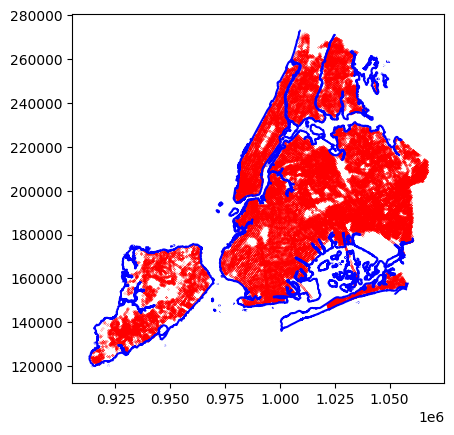

<Figure size 300x300 with 0 Axes>

In [31]:
#visualize full dataset
fig,ax = plt.subplots()
#plt.figure(figsize = (3,3))

#catchbasin_data.plt(ax = ax, facecolor = 'gray')
catchbasin_data.plot(ax = ax, color = 'red', markersize = .01)
shoreline_data.plot(ax = ax, color = 'blue')
plt.show()

In [87]:
#slice data using .cx[xmin:xmax, ymin:ymax]
catchbasin_data_sliced = catchbasin_data.cx[reducedminx:reducedmaxx, reducedminy:reducedmaxy]
catchbasin_data_sliced.head

<bound method NDFrame.head of Empty GeoDataFrame
Columns: [UNITID, LATITUDE, LONGITUDE, POINT_X, POINT_Y, geometry]
Index: []>

/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


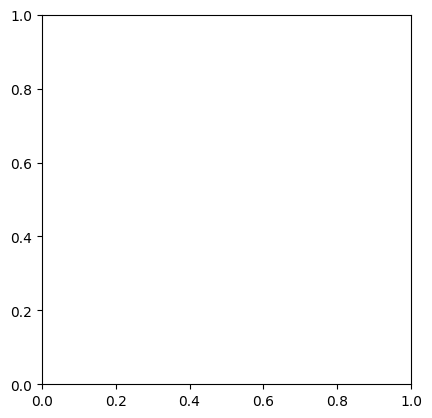

In [35]:
#visualize subset of dataset
fig,ax = plt.subplots()
#plt.figure(figsize = (3,3))

#catchbasin_data.plt(ax = ax, facecolor = 'gray')
catchbasin_data_sliced.plot(ax = ax, color = 'red', markersize = .01)
#shoreline_data.plot(ax = ax, color = 'blue')
plt.show()

In [19]:
#Create list of geometry column of shoreline data
shoreline_data_shapes = shoreline_data['geometry'].values.tolist()
shoreline_data_shapes[0:10]

In [ ]:
#specifiy shape of output grid in pixel units
zones_array_output_shape = shoreline_data.shape[1:]
#Project from pixel space to coordinate space
#shoreline_transform = shoreline_data.rio.transform()

In [22]:
#convert a polyline to a single point using arcpy
import arcpy

ModuleNotFoundError: No module named 'arcpy'